## Exploratory data analysis (EDA)
Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. And there are four types EDA, these are univariate non-graphical, multivariate non- graphical, univariate graphical, and multivariate graphical.

In [1]:
# importing libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

#### Importing scripts

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

#### Custom library

In [3]:
from PlottingFunctions import PlottingFunctions
from VisualisationPlots import VisualiseDf
from DistributionPlots import  DistributionPlots
from data_info import  DataInfo
#sns.set()

#### Loading data

In [4]:
df_ads = pd.read_csv("../data/AdSmartABdata.csv")

In [5]:
df_ads.head(2)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0


### Explore The Data

In [6]:
# info
df_info = DataInfo(df_ads)

In [7]:
df_info.shape_df()

Dataframe contains 8077 rows and 9 columns


In [8]:
df_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB
None


In [9]:
# copying dataframe and work on the copy 'df_copy'
dfCopy= df_ads.copy(deep=True)

In [10]:
# getting users who only selects yes or no, Since working on irresponive users wont be relevant
dfCopy = dfCopy[dfCopy['yes'] == 1].append(dfCopy[dfCopy['no'] == 1])
dfCopy.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [11]:
dfCopy.shape

(1243, 9)

In [12]:
# show the control group
control_df = dfCopy[dfCopy['experiment'] == 'control']
control_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
100,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1,0
157,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1,0


In [13]:
control_df.shape

(586, 9)

In [14]:
# show the exposed group
exposed_df = dfCopy[dfCopy['experiment'] == 'exposed']
exposed_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1,0
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1,0


In [15]:
exposed_df.shape

(657, 9)

## * Only 1243 auctions were responsive, out of which 586 are from the control group, and 657 form the exposed group.

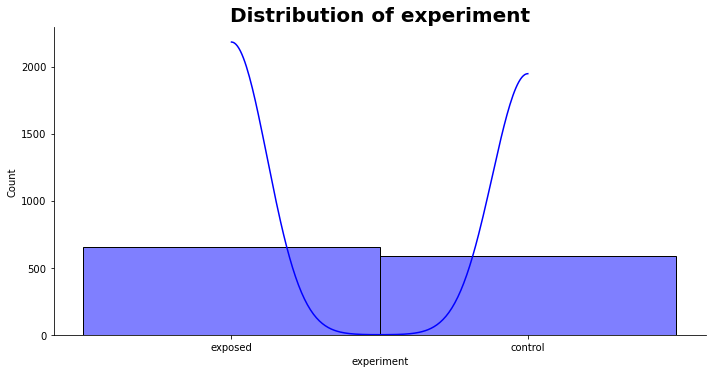

In [16]:
# histogram 
fig = VisualiseDf.plot_hist(dfCopy,'experiment','blue')

In [17]:
# grouping data by auction date and showing aggregates of 10 days
data_byDate = dfCopy.groupby(['date']).agg({'date': ['count']})
data_byDate.columns = ['count']
data_byDate = data_byDate.sort_values(by='count', ascending=False)
data_byDate = data_byDate.reset_index()
data_byDate.head(10)

,date,count
0,2020-07-03,325
1,2020-07-09,184
2,2020-07-08,177
3,2020-07-04,159
4,2020-07-10,124
5,2020-07-05,117
6,2020-07-07,83
7,2020-07-06,74


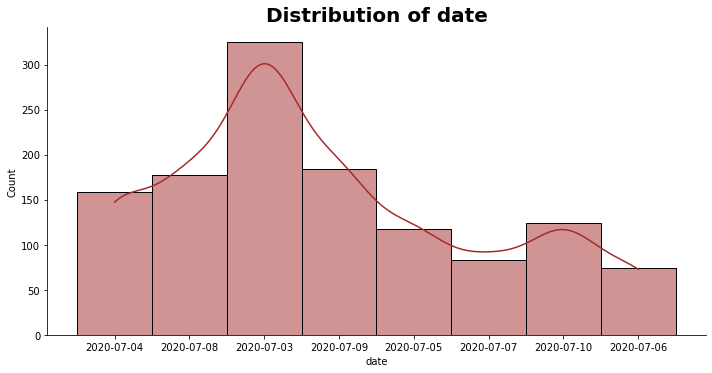

In [18]:
fig = VisualiseDf.plot_hist(dfCopy,'date','brown')

## * Responsive data was gathered on 8 days of experiment. And outh of this, July 3rd 2020 was when most reactions were counted.

In [19]:
# group by date and aggriagte all columns 
date_Agg = dfCopy.groupby('date').agg({'experiment':'count','hour':'sum','yes':'sum', 'no':'sum'})
date_Agg

,experiment,hour,yes,no
date,,,,
2020-07-03,325,4215,147,178
2020-07-04,159,1694,76,83
2020-07-05,117,1124,52,65
2020-07-06,74,417,35,39
2020-07-07,83,934,38,45
2020-07-08,177,2817,85,92
2020-07-09,184,2179,85,99
2020-07-10,124,940,54,70


## * this shows overall statuses in a day


In [20]:
# removing yes and no columns and replace it with response column. For both groups if response=1, it means yes 
#and if it is 0, it means no
##for control group
df1 = control_df[control_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = control_df[control_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
control_plot_df = df1.append(df2).reset_index(drop=True)
control_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
1,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
2,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
3,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
4,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


In [21]:
#do the same for exposed groups
df1 = exposed_df[exposed_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = exposed_df[exposed_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
exposed_plot_df = df1.append(df2).reset_index(drop=True)
exposed_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
2,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
3,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
4,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


In [22]:
# count yes and no for control
control_yes = control_plot_df.groupby(['response']).agg({'response': ['count']})
control_yes.columns = ['count']
control_yes = control_yes.reset_index()
control_yes

,response,count
0,0,322
1,1,264


In [23]:
#Do the same for exposed
exposed_yes = exposed_plot_df.groupby(['response']).agg({'response': ['count']})
exposed_yes.columns = ['count']
exposed_yes = exposed_yes.reset_index()
exposed_yes

,response,count
0,0,349
1,1,308


## The exposed group said 'yes' more times than that of the control group 

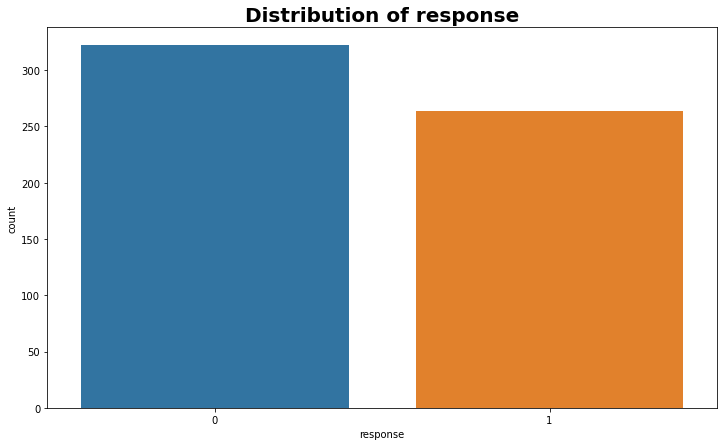

In [30]:
VisualiseDf.plot_count(control_plot_df, 'response')

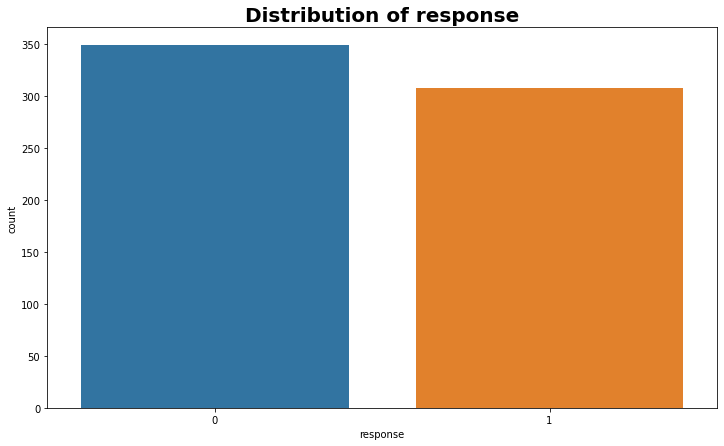

In [31]:
VisualiseDf.plot_count(exposed_plot_df, 'response')

In [34]:
control_plot_df.to_csv('../data/control_df.csv', index=False)
print("Control Data Saved ! ")

exposed_plot_df.to_csv('../data/exposed_df.csv', index=False)
print("Exposed Data Saved ! ")

Control Data Saved ! 
Exposed Data Saved ! 
